name : Joumana Mahmoud Farghaly 2401244006 

project description : This project analyzes AirBnB listings data in Paris to understand the impact of recent regulations introduced in 2015. The analysis includes profiling and cleaning the dataset, preparing aggregated tables for visualization, and creating charts to explore trends in listing prices and the number of new hosts over time. The goal is to identify how regulations may have affected host activity and pricing patterns in Paris.

## Objective 1 : Profile & QA the Data

In [5]:
import pandas as pd

#Load dataset
listings = pd.read_csv("Listings.csv", encoding="latin1")

# Display the first 5 rows 
listings.head()

C:\Users\ezz farghaly\AppData\Local\Temp\ipykernel_19620\2309070850.py:4: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv("Listings.csv", encoding="latin1")


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [6]:
# Check data types 
listings.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [7]:
# Convert the date column to datetime format
listings['host_since'] = pd.to_datetime(listings['host_since'])

# show change
listings.dtypes

listing_id                              int64
name                                   object
host_id                                 int64
host_since                     datetime64[ns]
host_location                          object
host_response_time                     object
host_response_rate                    float64
host_acceptance_rate                  float64
host_is_superhost                      object
host_total_listings_count             float64
host_has_profile_pic                   object
host_identity_verified                 object
neighbourhood                          object
district                               object
city                                   object
latitude                              float64
longitude                             float64
property_type                          object
room_type                              object
accommodates                            int64
bedrooms                              float64
amenities                         

In [8]:
# Filter rows where city is Paris
paris_listings = listings[listings['city'] == "Paris"]

# Keep the required columns
paris_listings = paris_listings[['host_since', 'neighbourhood', 'city', 
                                  'accommodates', 'price']]
#first 5 rows
paris_listings.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [9]:
# Check for missing values in each column
paris_listings.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [10]:
# Summary statistics for numeric columns
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


#### Objective 1 Summary

In this section, I converted the 'host_since' column to datetime format and filtered the dataset to include only listings located in Paris. I selected the relevant columns required for the analysis.
After checking for missing values, I calculated the Summary statistics for numeric columns . The dataset appears clean and ready for aggregation and visualization in the next section.

## Objective 2 : Prepare the Data for Visualization

In [11]:
# Group Paris listings by neighbourhood and calculate the average price
paris_listings_neighbourhood = (
    paris_listings
        .groupby('neighbourhood')['price']
        .mean()
        .sort_values()
        .reset_index()
)

# Display result
paris_listings_neighbourhood.head()

,neighbourhood,price
0,Menilmontant,74.942257
1,Buttes-Chaumont,82.690182
2,Buttes-Montmartre,87.209479
3,Reuilly,89.058402
4,Popincourt,90.559459


In [12]:
# Identify the most expensive neighbourhood (highest average price)
most_expensive_neighbourhood = paris_listings_neighbourhood.iloc[-1]['neighbourhood']

print("Most Expensive Neighbourhood:", most_expensive_neighbourhood)

# only the most expensive neighbourhood
expensive_area = paris_listings[
    paris_listings['neighbourhood'] == most_expensive_neighbourhood
]

# Group by accommodates and calculate average price
paris_listings_accomodations = (
    expensive_area
        .groupby('accommodates')['price']
        .mean()
        .sort_values()
        .reset_index()
)

paris_listings_accomodations.head()

Most Expensive Neighbourhood: Elysee


,accommodates,price
0,0,0.000000
1,1,79.522222
2,3,152.828767
3,2,155.103352
4,4,212.096070


In [13]:
#new column for host year
paris_listings['host_year'] = paris_listings['host_since'].dt.year

# group by host year
paris_listings_over_time = (
    paris_listings
        .groupby('host_year')
        .agg(  average_price=('price', 'mean'),new_hosts=('host_year', 'count') )
        .reset_index()
)

paris_listings_over_time.head()

,host_year,average_price,new_hosts
0,2008.0,77.750000,4
1,2009.0,159.641509,106
2,2010.0,125.031250,416
3,2011.0,124.828230,1339
4,2012.0,111.578615,4592


#### Objective 2 Summary

In this section, I grouped the Paris listings data by neighbourhood to calculate the average price and identify the most expensive area. I then analyzed how price varies by accommodation size within that neighbourhood.
Finally, I examined trends over time by grouping listings by the host’s starting year. This allowed me to calculate both the number of new hosts per year and the average listing price per year, preparing the data for visualization in the next section.

## Objective 3 – Visualizing the Data

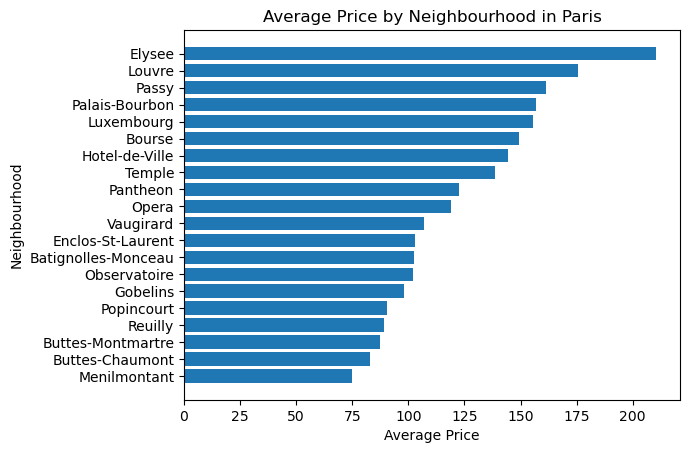

In [14]:
import matplotlib.pyplot as plt

# Horizontal Bar Chart – Average Price by Neighbourhood
plt.figure()
plt.barh(  paris_listings_neighbourhood['neighbourhood'], paris_listings_neighbourhood['price'] )
plt.title("Average Price by Neighbourhood in Paris")
plt.xlabel("Average Price")
plt.ylabel("Neighbourhood")

plt.show()

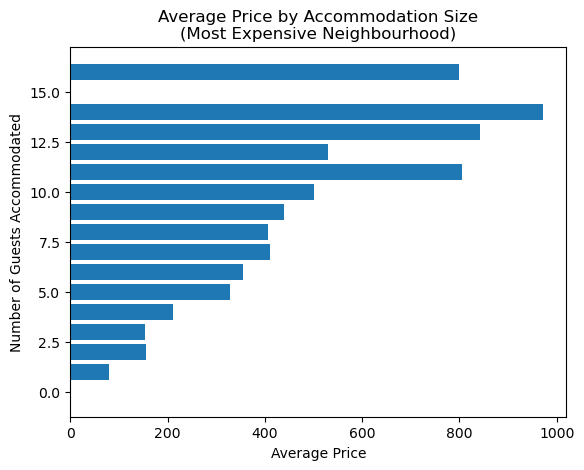

In [15]:
# Horizontal Bar Chart – Price by Accommodates (Most Expensive Area)
plt.figure()
plt.barh( paris_listings_accomodations['accommodates'],  paris_listings_accomodations['price'] )
plt.title("Average Price by Accommodation Size\n(Most Expensive Neighbourhood)")
plt.xlabel("Average Price")
plt.ylabel("Number of Guests Accommodated")

plt.show()

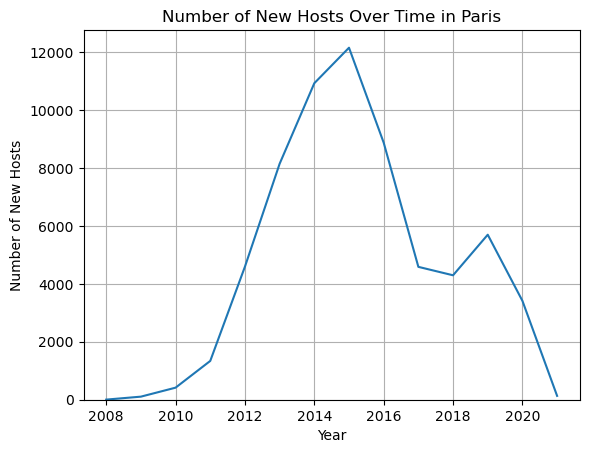

In [16]:
# Line Chart – Number of New Hosts Over Time
plt.figure()
plt.plot( paris_listings_over_time['host_year'], paris_listings_over_time['new_hosts'] )
plt.ylim(0)  # Set y-axis to start at 0
plt.title("Number of New Hosts Over Time in Paris")
plt.xlabel("Year")
plt.ylabel("Number of New Hosts")
plt.grid(True)

plt.show()

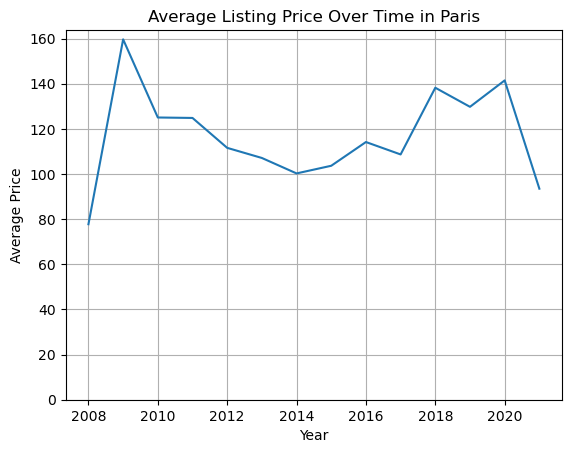

In [22]:
#Line Chart – Average Price Over Time
plt.figure()
plt.plot(paris_listings_over_time['host_year'],  paris_listings_over_time['average_price'])
plt.ylim(0)
plt.title("Average Listing Price Over Time in Paris")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid(True)

plt.show()

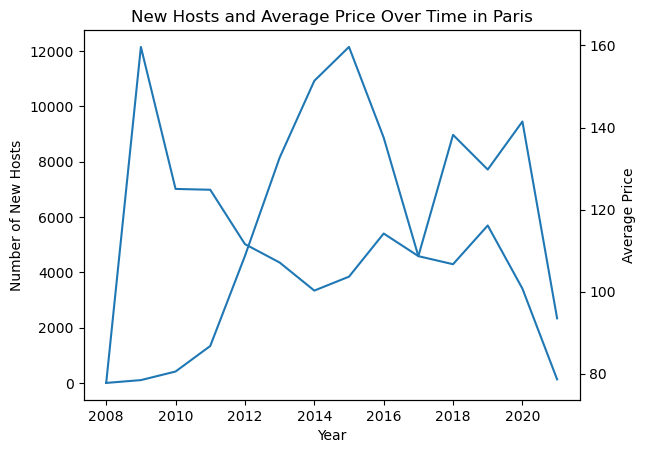

In [18]:
# (bonus) Dual-Axis Line Chart

fig, ax1 = plt.subplots()
# First axis :new hosts
ax1.plot( paris_listings_over_time['host_year'],  paris_listings_over_time['new_hosts'])

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of New Hosts")

# Second axis ;average price
ax2 = ax1.twinx()
ax2.plot( paris_listings_over_time['host_year'],
          paris_listings_over_time['average_price'])
ax2.set_ylabel("Average Price")

plt.title("New Hosts and Average Price Over Time in Paris")
plt.show()

### Final Project Insights

Based on the visualizations, The number of new hosts appears to grow rapidly until around 2015. After 2015, the growth rate slows down significantly, suggesting that the regulations introduced that year may have limited the expansion of new listings in Paris.

At the same time, average prices show an upward trend over time. This could suggest that stricter regulations reduced supply, which may have contributed to price increases in certain neighborhoods.

Overall, the 2015 regulations appear to have had an impact on host growth and potentially influenced pricing trends in the Paris AirBnB market.

### Which neighborhood in Paris has the highest average AirBnB listing price?
 Elysee